<a href="https://colab.research.google.com/github/cecibonnet/spotify_data/blob/main/spotify_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Setup and Introduction**

## Objective
The goal of this project is to build a playlist suited for parties.

## Dataset
The dataset used in this project is the `Spotify Tracks` dataset from [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset).

## Workflow
Data Analysis
1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Feature Engineering
4. Model Training and Evaluation
5. Results and Insights

# **Data Analysis**

### Data Loading and Exploration

In [3]:
# Get access to my Drive from Colab
from google.colab import drive # import the "drive" module so we can interact with drive
drive.mount('/content/drive') # créer un lien vers un dossier distant

# Import libraries
import pandas as pd             # for dataframe manipulation
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sl
from sklearn.linear_model import LogisticRegression

# Display parameters
pd.set_option('display.max_rows', 150) #afficher toutes les colonnes

Mounted at /content/drive


In [4]:
# Dataframe creation
path = "/content/drive/MyDrive/spotify_data/"
df = pd.read_csv(path+"dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


- Get the number of different tracks, artists, and albums.
- Get the name of all distinct genres.
- Visualization the distribution of values for the duration, tempo, popularity, danceability, energy, and acousticness variables.


In [6]:
# Exploratory analysis
## Count the number rows in my df DataFrame.
nb_rows = len(df)

## Count unique tracks IDs, track names, artists, and albums.
nb_artists = df['artists'].nunique()
nb_tracks = df['track_id'].nunique()
nb_titles = df['track_name'].nunique()
nb_albums = df['album_name'].nunique()

# Display the results.
print("nb_rows : %d" % (nb_rows))
print("nb_artists : %d" % (nb_artists))
print("nb_tracks : %d" % (nb_tracks))
print("nb_titles : %d" % (nb_titles))
print("nb_albums : %d" % (nb_albums))

nb_rows : 114000
nb_artists : 31437
nb_tracks : 89741
nb_titles : 73608
nb_albums : 46589


The dataset consists of **114k rows**, each row representing a track. However, refinement is necessary due to the presence of **duplicate track IDs**.

The number of unique track_ids (90k) is lower than the total number of rows (114k), indicating the presence of duplicate track_id entries. These duplicates need to be removed to ensure optimal recommendations, preventing the same track from being suggested more than once.

Duplicate track names : Indicating distinct track IDs share the same name, which is not surprising when working on music datasets. This won't be an issue here.

### Data Cleaning and Preprocessing

In [7]:
# Remove duplicate track IDs, keeping only the first occurence of each unique track_id.
## Create a condition DataFrame marking "True" for all duplicates except the first occurence.
condition = df.duplicated(subset='track_id', keep='first')

## Filter df to include only rows where condition is false.
df = df[~condition]

print("nb_lines : %d" % len(df))
print("nb_tracks : %d" % df['track_id'].nunique())

nb_lines : 89741
nb_tracks : 89741


After removing duplicate track IDs, the dataset now contains 89 741 rows, which corresponds to the total number of unique track IDs values.

This confirms that the dataset has been successfully deduplicated. One row represents now a unique track ID.

In [8]:
## Count the number of distinct genres
nb_genres = df['track_genre'].nunique()
print("nb_genres : %d" % (nb_genres))

## Store the unique genre names in an array
genre_names = df['track_genre'].unique()
genre_names

nb_genres : 113


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [9]:
# Exploring genres

## Count the number of distinct genres
nb_genres = df['track_genre'].nunique()
print("nb_genres : %d" % (nb_genres))

## Store the unique genre names in an array
genre_names = df['track_genre'].unique()
genre_names

## Group the dataset by genre and count the number of occurences (track IDs) in each group
genre_list = df.groupby('track_genre').size()
genre_list
genre_list.sort_values()

nb_genres : 113


,0
track_genre,
reggaeton,74
indie,134
house,210
punk,226
metal,232
reggae,256
dubstep,268
rock,342
latino,398


A wide variety of genres is included here : 113 genres. Each genre containing more than 74 track IDs.


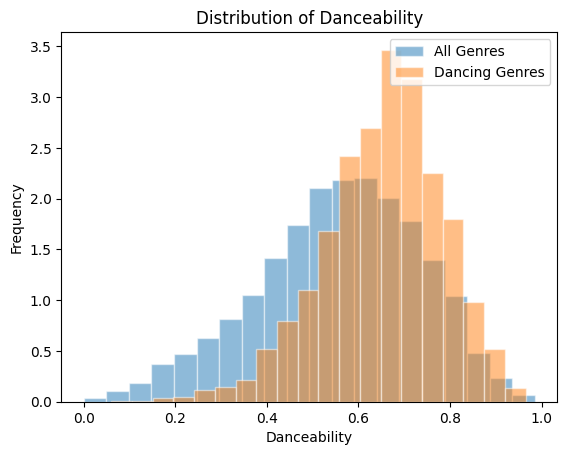

In [ ]:
# Visualize the distribution of values for the duration, tempo, popularity, danceability, energy, and acousticness variables.


#histogramme des valeurs de danceability
#histogramme des valeurs de danceability - chansons clubs

df_notdancing = df[~df["track_genre"].isin(dancing_genres)]
df_dancing = df[df["track_genre"].isin(dancing_genres)]

plt.hist(df_notdancing["danceability"], bins=20, edgecolor='white', density = True, alpha=0.5, label = "All Genres")
plt.hist(df_dancing["danceability"], bins=20, edgecolor='white', density = True, alpha=0.5, label= "Dancing Genres")


plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Distribution of Danceability")
plt.legend(loc='upper right')
plt.show()

In [10]:
# Exploring different characteristics describing genres to identify the relevant ones

## Let's create two different lists : one with non-dancing genres, other with dancing genres
ndg = ["sad", "opera", "sleep", "study"]
dg = ["club", "dance", "edm", "electro", "electronic", "party"]

## Create filtered DataFrames
ndg_table = df[df["track_genre"].isin(ndg)]
dg_table = df[df["track_genre"].isin(dg)]

## Display descriptive statistics for the initial datsets and the two DataFrames
print(df["danceability"].describe())
print(ndg_table["danceability"].describe())
print(dg_table["danceability"].describe())

count    89741.000000
mean         0.562166
std          0.176691
min          0.000000
25%          0.450000
50%          0.576000
75%          0.692000
max          0.985000
Name: danceability, dtype: float64
count    3411.000000
mean        0.442828
std         0.261816
min         0.000000
25%         0.194000
50%         0.443000
75%         0.689000
max         0.980000
Name: danceability, dtype: float64
count    4882.000000
mean        0.653586
std         0.128971
min         0.060100
25%         0.576000
50%         0.666000
75%         0.741000
max         0.965000
Name: danceability, dtype: float64


From the descriptive statistics, **dancing genres have a higher mean danceability** (0.65) compared to non-dancing genres (0.44) and more generally speaking to the other genres (0.56).

This aligns with the expectation that genres like dance, electronic, and edm are designed to get people moving, whereas genres like sad, opera, and study tend to have lower danceability scores.

Given this observation, danceability appears to be a relevant feature for creating a dancing playlist.

A similar relationship could be expected with energy, as higher energy tracks are often more danceable. Let's assume that energy follows a similar pattern and explore its correlation with danceability.

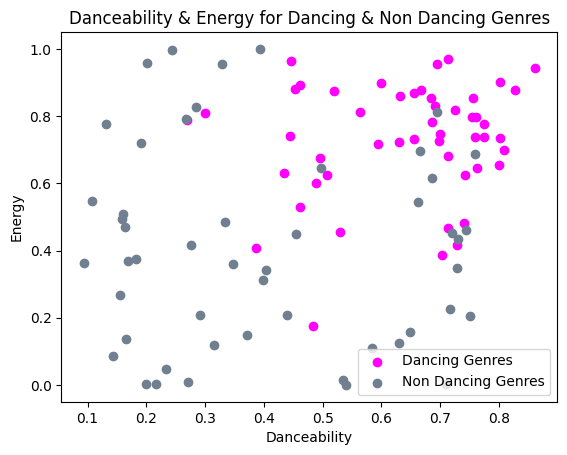

In [11]:
# Scatter plot of Danceability vs. Energy for Dancing and Non-Dancing Genres

## Sample 50 random tracks from the Dancing Genres table
x = np.array(dg_table["danceability"].sample(n=50))
y = np.array(dg_table["energy"].sample(n=50))

## Plotting Dancing Genres with red markers
plt.scatter(x, y, color = 'magenta',  label = "Dancing Genres")

## Sample 50 random track from the Non-Dancing Genres table
x = np.array(ndg_table["danceability"].sample(n=50))
y = np.array(ndg_table["energy"].sample(n=50))

## Plotting Non-Dancing Genres with green markers
plt.scatter(x, y, color = 'slategray', label = "Non Dancing Genres")

## Customize plot with labels, legend, and title
plt.legend()
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability & Energy for Dancing & Non Dancing Genres")

## Display the plot
plt.show()

The plot confirms that dancing genres generally have higher energy and danceability than non-dancing genres.

The relationship between danceability and energy seems to be stronger for dancing genres, as most pink points have higher danceability and energy values.

Non-dancing genres (grey) show more variation, as they are not consistenly low across both energy and danceability. They include tracks with both low and medium levels of danceability and energy.

Now, let's assess wich criteria are most relevant to characterize dancing genres and therefore help to recommend the best titles in my dancing playlist. Let's have a look at columns available

In [12]:
print(df.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


Among the columns avaible, the following are the most relevant for the analysis:
- danceability
- energy
- speechiness,
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- mode
- time_signature

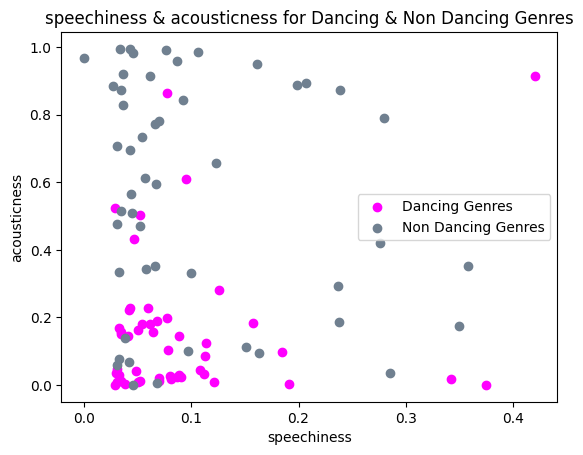

In [13]:
# Scatter plot of Speechiness vs. Acousticness for Dancing and Non-Dancing Genres

x = np.array(dg_table["speechiness"].sample(n=50))
y = np.array(dg_table["acousticness"].sample(n=50))

plt.scatter(x, y, color = 'magenta',  label = "Dancing Genres")

x = np.array(ndg_table["speechiness"].sample(n=50))
y = np.array(ndg_table["acousticness"].sample(n=50))

plt.scatter(x, y, color = 'slategray', label = "Non Dancing Genres")

plt.legend()
plt.xlabel("speechiness")
plt.ylabel("acousticness")
plt.title("speechiness & acousticness for Dancing & Non Dancing Genres")

plt.show()

As dancing and non-dancing genres are concentrated at low speechiness values, the speechiness might not be relevant to determine whether a track is dancing (or not).

In contrast, acousticness shows a clear separation between dancing and non-dancing genres :
- Dancing genres are tighly clustered at lower acousticness values (below 0.4)
- Non-dancing genres are widely spread across the full range of acousticness values, with many points clustered at higher values (0.8-1.0).


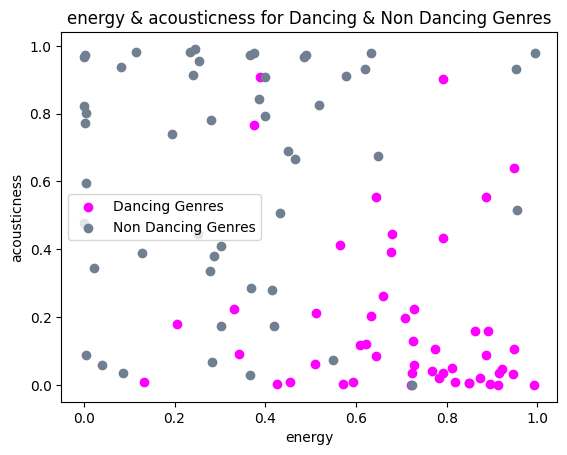

In [19]:
# Scatter plot of Energy vs. Acousticness for Dancing and Non-Dancing Genres

x = np.array(dg_table["energy"].sample(n=50))
y = np.array(dg_table["acousticness"].sample(n=50))

plt.scatter(x, y, color = 'magenta',  label = "Dancing Genres")

x = np.array(ndg_table["energy"].sample(n=50))
y = np.array(ndg_table["acousticness"].sample(n=50))

plt.scatter(x, y, color = 'slategray', label = "Non Dancing Genres")

plt.legend()
plt.xlabel("energy")
plt.ylabel("acousticness")
plt.title("energy & acousticness for Dancing & Non Dancing Genres")

plt.show()

This chart highlights how **dancing genres tend to be more energetic and less acoustic**, which makes **energy and acousticness important factors to consider** when categorizing or describing these genres.

As we noticed Energy and Acousticness are relevant criteria to describe dancing genres, let's go to use logistic regression to predict from X whether Y = 1 (dancing genre) or Y = 0 (non-dancing genre).

In machine learning, problems can be categorized as either regression or classification. Here, this is a classification problem, since we are predicting discrete categories (1 or 0).

We create the target variable Y where we assign 1 for dancing genres and 0 for non-dancing genres.

In [16]:
# Combine the Energy and Acousticness columns from dg_table and ndg_table into a single DataFrame
# Ensure that the indices are re-aligned : crucial to prevent potential issues for future steps.
X = pd.concat([dg_table[["energy", "acousticness"]], ndg_table[["energy", "acousticness"]]], ignore_index=True)

# Get the shape of my DataFrame
np.array(X).shape

(8293, 2)

In [26]:
# Create the target variable - Y DataFrame: 1 for dancing genre, 0 for non-dancing genre
Y = pd.Series([1] * len(dg_table) + [0] * len(ndg_table), name="dancing_genre")

np.array(Y).shape

len(X), len(Y)

(8293, 8293)

We made sure X and Y have the same shape.

In [23]:
model = LogisticRegression()
model.fit(X, Y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[ 4.12436769 -3.19074205]]
Intercept: [-0.87526778]


As we no

In [ ]:
#MISSION :
#Obj créer un modèle avec SL qui prédit à partir de X si Y = 1 ou 0 (utiliser la logistic regression)

#Créer Y
#Y : contient 1 colonne qui affiche 1 si dancing genre, si non dancing genre alors 0. autant de lignes que de track_id appartenant aux genres dancing & non dancing.
#Une fois qu'on a X et Y, entrainer une régression logistique avec comme variable X et comme label Y.


#En ML, il y a la de la régression et classification (c soit l'un soit l'autre), ici classification


# une fois qu'il a entrainer, s il erait intéressant de tracer cette droite sur le graph,
#une autre valeur plus générale, c'est de calculer l'accuracy du modèle

# WIKIPEDIA déf accuracy (faux positifs -> à savoir si la musique est bien pour party ou pas). Calculer accuracy avec skicit learn.


#Bon à savoir : Dans X je peux mettre autant de critères que possible mais impossible à représenter sur un plan

,energy,acousticness
0,0.671,0.09330
1,0.505,0.19700
2,0.835,0.00148
3,0.549,0.00268
4,0.869,0.00088
...,...,...
8288,0.296,0.02380
8289,0.226,0.49300
8290,0.716,0.01610
8291,0.694,0.44500


In [ ]:
# Get the tracks associated with dancing genres
dancing_genres = ["club", "dance", "edm", "electro", "electronic", "party"]
df[df["track_genre"] == dancing_genres[0]] #df[condition] --> appliquer condition à mon df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
17000,17000,2vXKRlJBXyOcvZYTdNeckS,Gesaffelstein;The Weeknd,Hyperion,Lost in the Fire (feat. The Weeknd),85,202093,True,0.658,0.671,...,-12.210,1,0.0363,0.093300,0.000927,0.1150,0.1660,100.966,4,club
17001,17001,095nyFKlTwa9JIp9cVrHOF,Gesaffelstein;Pharrell Williams,Blast Off (feat. Pharrell Williams),Blast Off (feat. Pharrell Williams),49,215973,False,0.627,0.505,...,-12.659,1,0.0549,0.197000,0.014900,0.0583,0.1460,100.005,4,club
17002,17002,6HJiKaPc4LYPczBFGSMBFs,Jay Dunham,I Got Summer On My Mind,I Got Summer On My Mind,65,188160,False,0.807,0.835,...,-6.849,0,0.0631,0.001480,0.527000,0.2330,0.3490,124.979,4,club
17003,17003,12Ypr3PCVJ2i7Uwz93q1Vl,Gesaffelstein,Conspiracy Pt.2,Opr,59,233965,False,0.748,0.549,...,-5.447,0,0.0650,0.002680,0.792000,0.1960,0.1970,101.033,4,club
17004,17004,2zwcnaxahJOnYwG0H6tXTz,Le Castle Vania,John Wick: Chapter 2 (Original Motion Picture ...,John Wick Mode,55,187173,False,0.683,0.869,...,-4.828,1,0.0515,0.000880,0.836000,0.2060,0.2190,123.983,4,club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17995,4UTMM08M1KoRFsBQlKnTth,Destryur;Cobra Wipeout,Panic,Narc City,15,188685,False,0.519,0.830,...,-6.355,0,0.0468,0.000056,0.642000,0.5180,0.2690,129.814,4,club
17996,17996,5gpxN0PKFEFbj2k3x3dK6D,Gaze,Shake the Pounce,Detail Queen,15,128399,False,0.515,0.721,...,-7.889,1,0.0297,0.583000,0.881000,0.0569,0.8510,113.176,4,club
17997,17997,6jNFu6bOsUYFMF3ejC990h,Marina Herlop,Nanook,Heks,14,238624,False,0.361,0.226,...,-12.589,0,0.0351,0.969000,0.167000,0.0907,0.0765,103.020,3,club
17998,17998,4RoblsWbf7A2wj2x91N9lb,Fire-Toolz,Eternal Home,Shenpa Indicator Light!!!,15,145403,False,0.357,0.882,...,-7.669,0,0.1190,0.002670,0.626000,0.2390,0.2910,114.430,4,club


In [ ]:
# Get the distribution of values
df["danceability"].describe()

,danceability
count,89741.000000
mean,0.562166
std,0.176691
min,0.000000
25%,0.450000
50%,0.576000
75%,0.692000
max,0.985000


# **Simple Methods**

In [ ]:
# similarity (broad)

# similarity (dancing party)
criteria = ["popularity", "danceability", "energy", "acousticness"]

df[df["danceability"] >= 0.90]
init_song = df[df["track_id"] == "1vMGIZbIkpaLSagdF2ygcV"]
init_song

titres_similaires = df[
    df["popularity"]
]

#trouver la similarité entre les titres selon les critères définis avec la distance euclidienne ou produit scalaire (ex: biniléarité)

KeyError: "None of [Index([73, 55, 57, 71, 82, 58, 74, 80, 74, 56,\n       ...\n       22, 32, 38, 39, 22, 21, 22, 22, 41, 22],\n      dtype='int64', length=89741)] are in the [columns]"

# **Data Science**

In [ ]:
exp_name = "exp_1"
exp_number = 4
"/root/experience/%s/else/%s/dataset_%f.csv" % (exp_name, path, exp_number)

'/root/experience/exp_1/else//content/drive/MyDrive/spotify_data//dataset_4.000000.csv'